Using Colab cache for faster access to the 'brain-tumor-classification-mri' dataset.
Data source import complete.
Dataset resized: 200 grayscale images, each 128x128


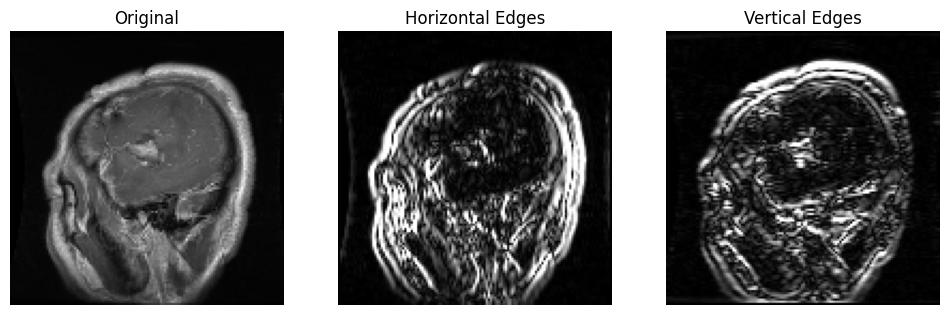

In [1]:
# ========================
# 1. Import Dataset
# ========================
import kagglehub
import os
import matplotlib.pyplot as plt
import cv2
import random

# Download dataset
sartajbhuvaji_brain_tumor_classification_mri_path = kagglehub.dataset_download(
    'sartajbhuvaji/brain-tumor-classification-mri'
)
print('Data source import complete.')

# ========================
# 2. Define Paths
# ========================
train_dir = os.path.join(sartajbhuvaji_brain_tumor_classification_mri_path, "Training")
classes = os.listdir(train_dir)

# ========================
# 3. Resize Dataset
# ========================
image_size = 128  # resize to 128x128
X = []
y = []

for label in classes:
    folder = os.path.join(train_dir, label)
    for file in os.listdir(folder)[:50]:  # limit for speed
        img_path = os.path.join(folder, file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # grayscale for filtering
        img = cv2.resize(img, (image_size, image_size))
        X.append(img)
        y.append(label)

print(f"Dataset resized: {len(X)} grayscale images, each {image_size}x{image_size}")

# ========================
# 4. Horizontal & Vertical Filters
# ========================
# Define filters
horizontal_filter = cv2.Sobel  # detects horizontal edges
vertical_filter = cv2.Sobel    # detects vertical edges

# Pick a random image
idx = random.randint(0, len(X)-1)
original = X[idx]

# Apply filters
horizontal_edges = cv2.Sobel(original, cv2.CV_64F, 1, 0, ksize=3)  # dx=1, dy=0
vertical_edges = cv2.Sobel(original, cv2.CV_64F, 0, 1, ksize=3)    # dx=0, dy=1

# Convert back to uint8 for display
horizontal_edges = cv2.convertScaleAbs(horizontal_edges)
vertical_edges = cv2.convertScaleAbs(vertical_edges)

# ========================
# 5. Visualization
# ========================
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(original, cmap="gray")
axes[0].set_title("Original")
axes[0].axis("off")

axes[1].imshow(horizontal_edges, cmap="gray")
axes[1].set_title("Horizontal Edges")
axes[1].axis("off")

axes[2].imshow(vertical_edges, cmap="gray")
axes[2].set_title("Vertical Edges")
axes[2].axis("off")

plt.show()
